## Imports

In [3]:
import numpy as np
import uproot
data_dir = "/Users/weisser/MIT_Dropbox/LbVMWeisser_shared/Tracking/Simulated_Velo/LHCbPVFinding_DataSets"
import matplotlib.pyplot as plt
%matplotlib inline
#from sklearn.neighbors import KernelDensity
from scipy.signal import find_peaks_cwt
from scipy.signal import argrelextrema 
import math


In [4]:
f = uproot.open(data_dir+"/Data_ROOT/pvs_weisser.root")
#f = uproot.open(data_dir+"/Data_ROOT/pvs_weisser_old_smearing.root")
f.classes()
t = f["data"]
t.keys()


['pvr_x',
 'pvr_y',
 'pvr_z',
 'hit_x',
 'hit_y',
 'hit_z',
 'hit_prt',
 'prt_pid',
 'prt_px',
 'prt_py',
 'prt_pz',
 'prt_e',
 'prt_x',
 'prt_y',
 'prt_z']

## Explore

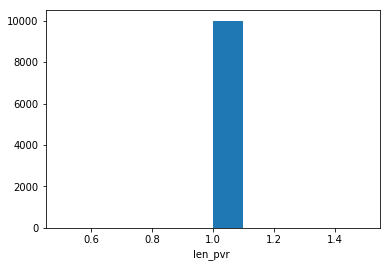

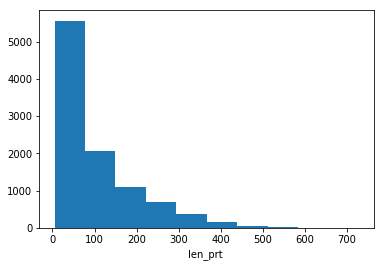

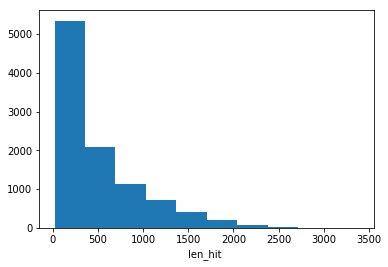

Number of events : 				10000
Average number of pvs per event : 		1.0
Average number of particles per event : 	103.1129
Average number of hits per event : 		508.174

pvr_z : 
[[ 162.93276121],
 [ 72.60984347],
 [ 149.25316414],
 ...,
 [ 19.46424366],
 [ 136.27833445],
 [ 180.75578308]] 

prt_z : 
[[ 162.93276121  162.93276121  162.93276121 ...  -82.55716777  163.2698931   163.2698931 ],
 [ 72.60984347  72.60984347  72.60984347 ...  72.60984347  72.60947812  72.60947812],
 [ 149.25316414  149.25316414  149.25316414 ...  584.43638033  439.47399028  439.47399028],
 ...,
 [ 19.46424366  19.46424366  19.46424366 ...   24.30625306 -111.32076198 -111.32076198],
 [ 136.27833445  136.27833445  136.27833445 ...  136.27833445  136.27833445  136.27833445],
 [ 180.75578308  180.75578308  180.75578308 ...  428.18003464  186.75066234  186.75066234]] 

hit_z : 
[[ 616.  661.  706. ...  263.  325.  402.],
 [ 238.  263.  325. ... -239. -264. -289.],
 [-12. -37. -62. ...  661.  706.  751.],
 ...,
 [  76. 

In [5]:
if True:
    data_dict = t.arrays()
    len_pvr = [len(i) for i in data_dict["pvr_z"]]
    len_prt = [len(i) for i in data_dict["prt_z"]]
    len_hit = [len(i) for i in data_dict["hit_z"]]



    plt.hist(len_pvr)
    plt.xlabel("len_pvr ")
    plt.show()

    plt.hist(len_prt)
    plt.xlabel("len_prt ")
    plt.show()

    plt.hist(len_hit)
    plt.xlabel("len_hit ")
    plt.show()

    print "Number of events : \t\t\t\t", len(data_dict["pvr_z"])
    print "Average number of pvs per event : \t\t", np.average([len(i) for i in data_dict["pvr_z"]])
    print "Average number of particles per event : \t", np.average([len(i) for i in data_dict["prt_z"]])
    print "Average number of hits per event : \t\t", np.average([len(i) for i in data_dict["hit_z"]])

    print "\npvr_z : \n", data_dict["pvr_z"], "\n\nprt_z : \n", data_dict["prt_z"], "\n\nhit_z : \n", data_dict["hit_z"] 

In [6]:
# Simple (2D) Linear Regression. Gaussian uncertainties of std dev beta in y variable. No uncertainties in x variable
# As proxy for x intercept uncertainty take the distance from the x intercept at which the y distance from the x axis 
# corresponds to one standard dev in y (beta).
# If y = m * x + c
# Intercept is at - c / m
# Intercept uncertainty proxy is beta / m

# Look at http://science.widener.edu/svb/stats/regress.html

def linear_regression(x, y):

    if True:
        mean_x = np.mean(x);   mean_y = np.mean(y);
        N = len(y)
        assert N == len(x)
        s_xx = sum([(x[i]-mean_x)*(x[i]-mean_x) for i in range(N)])
        s_yy = sum([(y[i]-mean_y)*(y[i]-mean_y) for i in range(N)])
        s_xy = sum([(x[i]-mean_x)*(y[i]-mean_y) for i in range(N)])
        
        #print s_xx, s_yy, s_xy
        
        m = s_xy / s_xx
        c = mean_y - m * mean_x
        intercept = mean_x - mean_y / m
        
        #print "m, c, intercept : \t", m, c, intercept
        
        beta = N / sum([(y[i]- c - m*x[i])*(y[i]- c - m*x[i]) for i in range(N)]) #This gives nonsense result
        
        s_r = np.sqrt((s_yy - np.square(m)*s_xx)/(N-2) )
        s_y = s_r * np.sqrt(1+1./N + (x-mean_x)**2/s_xx) 
        #s_x = s_r/m * sqrt(1./M + 1./N + (y_unk-mean_y)**2/(m**2*s_xx))
        #print beta
        #print s_r, np.mean(s_y)
        
        beta = np.mean(s_y) #This is the standard deviation that is calculated by the regression. 
        #It is not the actual std dev
        
    
    
    
    
    
    
    intercept_uncertainty = beta / m 
    
    
    return intercept, intercept_uncertainty
    

In [5]:
#Testing the linear regression function
if False:
    
    if True:
        l = [1, 2, 3, 4 ]

        x_train = np.array(l)
        y_train = np.array([2*i + 1 + np.random.normal(loc=0., scale=0.001) for i in l])

    else:
        l = [1, 2, 3, 4 ]
        l1 = [1.5, 2.5]

        x_train = np.array(l+l1)
        y_train = np.array([2*i + 1 + np.random.normal(loc=0., scale=0.001) for i in l] +
                          [3*i + 0.5 + np.random.normal(loc=0., scale=0.001) for i in l1])


    #X_train = np.c_[1, 2, 3, 4 ].T
    #y_train = [3, 5, ]
    X_test = np.c_[0, 2].T
    linear_regression(x_train, y_train)


## Fill Bins

In [ ]:
# 0.1 milliradian corresponds to 63000 bins
binning_scheme = [[10, 0],[10, 0.5]]
#binning_scheme = [[63000, 0],[63000, 0.5]] # skipped many events
binning_scheme = [[6300, 0],[6300, 0.5]]
# 10, 0.5 means you divide 2 pi into 10 bins. the offset is 0.5 times a bin

data_dict = t.arrays()

pvr_x_pred = []


n_events = len(data_dict["hit_x"])

status = []

print "e_i :\t                 ",

counter = 0
for e_i in range(n_events):
#for e_i in range(1):
#for e_i in [869]: #Uncertainty valishes
#for e_i in [6700]: #No maxima found
    if (e_i%100==0 ): print "|",
    if (e_i%1000==0 ): print "\t{}  out of  {}k\ne_i :\t".format(e_i/1000., n_events/1000. ),
    if e_i%10000==0: print_bool=True
    else: print_bool=False

    counter += 1
    
    bin_contents = []
    for n_binning_scheme, (nbins, offset_bin_frac) in enumerate(binning_scheme):
        bin_contents.append({})
    
    hit_phi = np.arctan2(data_dict["hit_y"][e_i], data_dict["hit_x"][e_i])
    hit_r   = np.sqrt(np.square(data_dict["hit_y"][e_i]) + np.square(data_dict["hit_x"][e_i]))
    #print hit_phi
    
    ##################################################
    ### FILL BINS
    ##################################################
    for n_binning_scheme in range(len(binning_scheme)):
        nbins, offset_bin_frac = binning_scheme[n_binning_scheme][0], binning_scheme[n_binning_scheme][1]
        #vectorised and no bin definitions necessary
        hit_phi_obs = hit_phi - 2.*np.pi*offset_bin_frac/nbins  #Rotating the bins with angle alpha is the same as rotating the point with angle - alpha
        hit_phi_obs = hit_phi_obs % (2 * np.pi ) # taking care of modulo
        hit_bins = (hit_phi_obs //(2 * np.pi / nbins)).astype(int)
        

        #print hit_phi_obs
        #print len(hit_bins), hit_bins

        for j, b in enumerate(hit_bins):
            #bin_contents[n_binning_scheme][b].append([data_dict["hit_z"][i][j], hit_r[j]])
            if b in bin_contents[n_binning_scheme]:
                bin_contents[n_binning_scheme][b].append([data_dict["hit_z"][e_i][j], hit_r[j]])
            else:
                bin_contents[n_binning_scheme][b]=[[data_dict["hit_z"][e_i][j], hit_r[j]]]
                
    #print counter
    #print bin_contents
    
    
    
    ##################################################
    ### DO REGRESSION
    ##################################################
    kernel_inputs_orig = []
    for n_binning_scheme, (nbins, offset_bin_frac) in enumerate(binning_scheme):
        kernel_inputs_orig.append([])

    n_skipped_few_hits = 0
    n_skipped_vanishing_uncertainty  = 0
    n_total   = 0

    
    for n_binning_scheme in range(len(binning_scheme)):
        nbins, offset_bin_frac = binning_scheme[n_binning_scheme][0], binning_scheme[n_binning_scheme][1]
        for key in bin_contents[n_binning_scheme]:
            n_total +=1
            data = np.array(bin_contents[n_binning_scheme][key])
            #print data.shape[0],
            if (data.shape[0] < 3): n_skipped_few_hits+=1; continue
            intercept, intercept_uncertainty = linear_regression(data[:, 0], data[:,1])
            if (math.isnan(intercept_uncertainty) or intercept_uncertainty==0 ): 
                n_skipped_vanishing_uncertainty += 1
                intercept_uncertainty = 1E-6
                l1, l2= data[:, 0], data[:,1]
                m1 = float(l2[1]-l2[0])/(l1[1]-l1[0])
                m2 = float(l2[2]-l2[1])/(l1[2]-l1[1])
                #print "gradients : ", m1, m2
                
                #print "data[:, 0], data[:,1] :", data[:, 0], data[:,1]
                #print [ 126.034164473,  176.0073111,   250.986510331][2], data[:, 0][2]
                #print [ 126.034164473,  176.0073111,   250.986510331][0] ==data[:, 0][0], [ 14.61113696,  21.20112183,  31.0886678 ]==data[:,1].tolist()
                #print linear_regression(data[:, 0], np.random.normal(data[:,1],1E-8*np.average(data[:,1])))
                #print linear_regression(data[:, 0], data[:,1])
                #print linear_regression([ 126.03416447,  176.0073111,   250.98651033], [ 14.61113696,  21.20112183,  31.0886678 ])
            else:
                #print " intercept, intercept_uncertainty  : ", intercept, intercept_uncertainty
                kernel_inputs_orig[n_binning_scheme].append([intercept, intercept_uncertainty])

    
    
    #print kernel_inputs_orig
    if print_bool : print "\nn_skipped_few_hits, n_skipped_vanishing_uncertainty / n_total : ", n_skipped_few_hits, " , ", n_skipped_vanishing_uncertainty, " / ", n_total
        
    if n_skipped_few_hits + n_skipped_vanishing_uncertainty == n_total:
        no_usable_bins = 1
        no_maxima_found = 1
        status.append([n_skipped_few_hits, n_skipped_vanishing_uncertainty, n_total, no_usable_bins ,no_maxima_found])
        pvr_x_pred.append([ [-300], [-1]])
        continue
    
    ##################################################
    ### KERNEL DENSITY ESTIMATION
    ##################################################
    
    # Neither scipy.stats (gaussian_kde) not sklearn implementations allow to vary bandwidth on a per entry level
    # Had to implement it myself

    x_plot = np.linspace(-200, 400, 1200)
    #x_plot = np.linspace(100, 200, 200)
    #x_plot = np.linspace(-200, 400, 5)
    y_plot = np.zeros(len(x_plot))
    #X_plot = np.linspace(-200, 400, 1200)[:, np.newaxis]

    kernel_inputs = []
    for a in kernel_inputs_orig: kernel_inputs.extend(a)    #flatten binning scheme

    kernel_inputs = np.array(kernel_inputs)
    #print kernel_inputs
    #print "kernel_inputs.shape : ", kernel_inputs.shape
    #print kernel_inputs


    def gaussian(x, mu, sig):
        return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

    for a in range(kernel_inputs.shape[0]):
        #print "y_plot : ", y_plot
        y_plot += gaussian(x_plot, kernel_inputs[a,0], kernel_inputs[a,1])

    #print "y_plot : ", y_plot

    #Normalise
    # Compute the area using the composite trapezoidal rule.
    area = np.trapz(y_plot, dx=(x_plot[1]- x_plot[0]))
    #area = np.trapz(y_plot, dx=1./len(y_plot)) #Assuming x_max - x_min is 1
    y_plot = y_plot/ area
    #y_plot = y_plot/ np.linalg.norm(y_plot)


    
    
    if print_bool : print "Real PVs : ", data_dict["pvr_z"][e_i]
    
    #if print_bool :
    if True:
        plt.clf()
        plt.fill_between(x_plot, 0, y_plot)
        plt.axvline(x=data_dict["pvr_z"][e_i], color='r', lw=1., linestyle = '-.')
        plt.fill_between(x_plot, 0, y_plot, color='b')
        
    
    #widths = np.linspace(5,200,40)
    #indexes = find_peaks_cwt(y_plot, widths)
    #print "indexes : ", indexes
    
    
    if True:
        # for local maxima
        indices = argrelextrema(y_plot, np.greater)[0]
        #print indices
        if len(indices) > 0:
            index_max = indices[np.argmax(y_plot[indices])]
            if print_bool : print "Max predicted : ", x_plot[index_max], y_plot[index_max]
            pvr_x_pred.append([ [x_plot[index_max]], [y_plot[index_max]]])
            no_maxima_found = 0
        else :
            print "y_plot : ", y_plot
            no_maxima_found = 1
            print "No maxima found, e_i = ", e_i
            pvr_x_pred.append([ [-300], [-1]])
            
        no_usable_bins = 0
            
    status.append([n_skipped_few_hits, n_skipped_vanishing_uncertainty, n_total, no_usable_bins ,no_maxima_found])
    
    
print "\nn_skipped_few_hits, n_skipped_vanishing_uncertainty, n_total, no_usable_bins ,no_maxima_found\n", np.sum(np.array(status), axis=0)    
#print pvr_x_pred

e_i :	                  | 	0.0  out of  10.0k
e_i :	
n_skipped_few_hits, n_skipped_vanishing_uncertainty / n_total :  1150  ,  0  /  1498
Real PVs :  [ 162.93276121]
Max predicted :  162.802335279 0.0135919847449


/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:51: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in divide
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:88: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:89: RuntimeWarning: divide by zero encountered in double_scalars


| | | | | | | | | | 	1.0  out of  10.0k
e_i :	|

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in sqrt


 | | | | | | | | | 	2.0  out of  10.0k
e_i :	| | | | |

In [29]:
cntr = 0
for i in range(n_events):
    if pvr_x_pred[i][0][0]==-300:
        cntr +=1
print cntr

1750


error_counter :  2236  /  10000


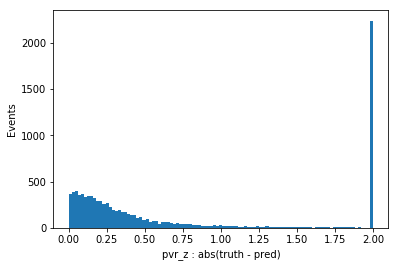

In [30]:
# This can only be used for 1 PV per event
diff = []
for i in range(n_events):
#for i in range(1):
    assert len(data_dict["pvr_z"][i])==1
    diff.append(abs(data_dict["pvr_z"][i][0] - pvr_x_pred[i][0][0]))

diff_reasonable = []
error_counter = 0
for _ in diff:
    if _ < 2: diff_reasonable.append(_)
    else: error_counter +=1
    
print "error_counter : ", error_counter, " / ", n_events

n, bins, patches = plt.hist(np.clip(diff, 0, 2), bins=np.linspace(0,2,100)) # Make the last bin an overflow bin
plt.xlabel("pvr_z : abs(truth - pred)")
plt.ylabel("Events")